In [1]:
from typing import Callable
from os import makedirs
from os.path import join
import numpy as np
import pandas as pd
from verma_net_radiation_sensitivity.verma_net_radiation_sensitivity import process_verma_net_radiation_table
from STIC_sensitivity import process_STIC_table
from sensitivity import perturbed_run
import matplotlib.pyplot as plt

In [2]:
input_df = pd.read_csv("inputs.csv")
input_df = input_df[input_df.fAPARmax != 0]
input_df

,tower,lat,lon,orbit,scene,tile,date_UTC,doy,time_solar,AOT,...,Topt,fAPARmax,LE_insitu,H_insitu,Rn_insitu,G_insitu,SWin_insitu,SWout_insitu,LWin_insitu,LWout_insitu
0,US-Ha2,42.5393,-72.1779,9254,9,18TYN,2020-02-22,53,2020-02-21 19:11:17.304,0.088195,...,0.0,0.5545,23.770000,NaN,NaN,NaN,-1.680,0.758,266.0,307.0
1,US-Ha2,42.5393,-72.1779,10150,9,18TYN,2020-04-20,111,2020-04-19 19:11:17.304,0.237342,...,0.0,0.5545,37.980000,100.200000,128.80,NaN,-4.610,2.300,257.0,354.0
2,US-Ha2,42.5393,-72.1779,10352,9,18TYN,2020-05-03,124,2020-05-02 19:11:17.304,0.107484,...,0.0,0.5545,68.060000,152.300000,261.30,NaN,-4.050,0.952,316.0,419.0
3,US-Ha2,42.5393,-72.1779,10684,7,18TYN,2020-05-24,145,2020-05-23 19:11:17.304,0.094339,...,0.0,0.5545,NaN,NaN,NaN,NaN,-0.525,0.463,381.0,425.0
4,US-Ha2,42.5393,-72.1779,11069,8,18TYN,2020-06-18,170,2020-06-17 19:11:17.304,0.050474,...,0.0,0.5545,122.200000,292.500000,657.60,NaN,10.000,2.320,310.0,408.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,US-xUK,39.0404,-95.1921,10994,7,15SUD,2020-06-13,165,2020-06-12 17:39:13.896,0.107889,...,5.8,0.4664,NaN,NaN,368.81,17.024,347.290,67.140,411.0,488.9
132,US-xUK,39.0404,-95.1921,11909,6,15SUD,2020-08-11,224,2020-08-10 17:39:13.896,0.143261,...,5.8,0.4664,131.783751,6.519267,279.97,14.633,347.330,59.370,363.0,440.6
133,US-xUK,39.0404,-95.1921,16668,8,15SUD,2021-06-14,165,2021-06-13 17:39:13.896,0.121046,...,5.8,0.4664,NaN,NaN,NaN,NaN,347.290,67.140,411.0,488.9
134,US-xUK,39.0404,-95.1921,16810,8,15SUD,2021-06-23,174,2021-06-22 17:39:13.896,0.109902,...,5.8,0.4664,237.726708,187.862743,764.71,16.236,385.650,67.010,387.0,466.6


In [3]:
def process_verma_STIC_table(input_df: pd.DataFrame) -> pd.DataFrame:
    df = input_df.copy()
    df["Rn"] = df["Rn_insitu"]

    result = process_STIC_table(
        # process_verma_net_radiation_table(input_df),
        df,
        max_iterations=30,
        use_variable_alpha=True
    )

    return result

In [4]:
# input_df = pd.read_csv("calval_final_50_PTJPL_inputs.csv")

# if "Ta" in input_df and "Ta_C" not in input_df:
#     # input_df.rename({"Ta": "Ta_C"}, inplace=True)
#     input_df["Ta_C"] = input_df["Ta"]

# input_df = input_df[input_df.fAPARmax.apply(lambda fAPARmax: fAPARmax > 0.001)]
# input_df = input_df[input_df.NDVI.apply(lambda NDVI: NDVI > 0.05)]

# np.nanmin(input_df.ST_C), np.nanmax(input_df.ST_C)

In [5]:
processed = process_verma_STIC_table(input_df)
processed

[2024-11-19 18:21:13 INFO] variable Ms min: 0.000 mean: 0.417 max: 1.000 nan: 33.82%
[2024-11-19 18:21:13 INFO] running STIC iteration 1 / 30
[2024-11-19 18:21:13 INFO] using variable Priestley-Taylor alpha with mean: 1.747
[2024-11-19 18:21:13 INFO] completed STIC iteration 1 / 30 with max LE change: 254.981 (0.00 seconds)
[2024-11-19 18:21:13 INFO] variable SM_1 min: 0.000 mean: 0.404 max: 1.000 nan: 33.82%
[2024-11-19 18:21:13 INFO] variable G_1 min: 0.409 mean: 25.575 max: 103.700 nan: 52.21%
[2024-11-19 18:21:13 INFO] variable LE_1 min: 2.519 mean: 306.328 max: 682.235 nan: 52.94%
[2024-11-19 18:21:13 INFO] running STIC iteration 2 / 30
[2024-11-19 18:21:13 INFO] using variable Priestley-Taylor alpha with mean: 4.013
[2024-11-19 18:21:13 INFO] completed STIC iteration 2 / 30 with max LE change: 69.165 (0.00 seconds)
[2024-11-19 18:21:13 INFO] variable SM_2 min: 0.000 mean: 0.403 max: 1.000 nan: 33.82%
[2024-11-19 18:21:13 INFO] variable G_2 min: 0.409 mean: 25.575 max: 103.700 nan

/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/initialize_without_solar.py:65: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/closure.py:49: RuntimeWarning: divide by zero encountered in divide
  gS = (-(2 * (phi_Wm2 * alpha * delta_hPa * Ea_hPa * gamma_hPa - phi_Wm2 * alpha * delta_hPa * Es_hPa * gamma_hPa)) / (Cp_Jkg * Estar_hPa ** 2 * gamma_hPa * rho_kgm3 - Cp_Jkg * Es_hPa ** 2 * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * delta_hPa * Es_hPa ** 2 * rho_kgm3 + 2 * Cp_Jkg * delta_hPa * Ea_hPa * Es_hPa * rho_kgm3 - 2 * Cp_Jkg * delta_hPa * Ea_hPa * Estar_hPa * rho_kgm3 + 2 * Cp_Jkg * delta_hPa * Es_hPa * Estar_hPa * rho_kgm3 + 2 * Cp_Jkg * Ea_hPa * Es_hPa * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * Ea_hPa * Estar_hPa * gamma_hPa * rho_kgm3 + Cp_Jkg * SM * Es_hPa ** 2 * gamma_hPa * rho_kgm3 + Cp_Jkg * SM * Estar_hPa ** 2 * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * SM * Es_hPa * Estar_hPa * gamma_hPa *

,tower,lat,lon,orbit,scene,tile,date_UTC,doy,time_solar,AOT,...,SWout_insitu,LWin_insitu,LWout_insitu,LE_max_change,iteration,LE,LE_change,LEt,PT,G
0,US-Ha2,42.5393,-72.1779,9254,9,18TYN,2020-02-22,53,2020-02-21 19:11:17.304,0.088195,...,0.758,266.0,307.0,1.943971,20,NaN,NaN,NaN,NaN,NaN
1,US-Ha2,42.5393,-72.1779,10150,9,18TYN,2020-04-20,111,2020-04-19 19:11:17.304,0.237342,...,2.300,257.0,354.0,1.943971,20,7.952422,0.006658,6.235901,49.488636,13.975096
2,US-Ha2,42.5393,-72.1779,10352,9,18TYN,2020-05-03,124,2020-05-02 19:11:17.304,0.107484,...,0.952,316.0,419.0,1.943971,20,189.868200,0.023019,17.131751,192.067093,10.667777
3,US-Ha2,42.5393,-72.1779,10684,7,18TYN,2020-05-24,145,2020-05-23 19:11:17.304,0.094339,...,0.463,381.0,425.0,1.943971,20,NaN,NaN,NaN,NaN,NaN
4,US-Ha2,42.5393,-72.1779,11069,8,18TYN,2020-06-18,170,2020-06-17 19:11:17.304,0.050474,...,2.320,310.0,408.0,1.943971,20,515.908759,0.283590,265.563144,679.648294,30.540498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,US-xUK,39.0404,-95.1921,10994,7,15SUD,2020-06-13,165,2020-06-12 17:39:13.896,0.107889,...,67.140,411.0,488.9,1.943971,20,337.321245,0.464724,184.484351,443.832035,19.411566
132,US-xUK,39.0404,-95.1921,11909,6,15SUD,2020-08-11,224,2020-08-10 17:39:13.896,0.143261,...,59.370,363.0,440.6,1.943971,20,255.163126,0.000000,77.063978,419.614938,24.806874
133,US-xUK,39.0404,-95.1921,16668,8,15SUD,2021-06-14,165,2021-06-13 17:39:13.896,0.121046,...,67.140,411.0,488.9,1.943971,20,NaN,NaN,NaN,NaN,NaN
134,US-xUK,39.0404,-95.1921,16810,8,15SUD,2021-06-23,174,2021-06-22 17:39:13.896,0.109902,...,67.010,387.0,466.6,1.943971,20,NaN,NaN,NaN,NaN,26.436100


In [6]:
processed.columns

Index(['tower', 'lat', 'lon', 'orbit', 'scene', 'tile', 'date_UTC', 'doy',
       'time_solar', 'AOT', 'COT', 'vapor_gccm', 'ozone_cm', 'SZA', 'KG',
       'BESSinst', 'ESI', 'ESIdaily', 'ESIdailyUncertainty', 'ETdaily',
       'ETdailyUncertainty', 'ETinstUncertainty', 'EmisWB', 'GPP', 'LST',
       'LST_err', 'MOD16inst', 'NDVI-UQ', 'PET', 'PTJPLSMcanopy',
       'PTJPLSMinst', 'PTJPLSMinterception', 'PTJPLSMsoil', 'RH', 'Rg', 'Rn',
       'SM', 'STICcanopy', 'STICinst', 'Ta', 'WUE', 'albedo-UQ', 'height',
       'radiance_1', 'radiance_2', 'radiance_3', 'radiance_4', 'radiance_5',
       'view_zenith', 'year', 'Ta_C', 'ST_K', 'NDVI', 'albedo', 'ST_C',
       'elevation_km', 'Ra', 'UV', 'VIS', 'NIR', 'VISdiff', 'NIRdiff',
       'VISdir', 'NIRdir', 'SWout', 'LWin', 'LWout', 'hour_of_day', 'Topt',
       'fAPARmax', 'LE_insitu', 'H_insitu', 'Rn_insitu', 'G_insitu',
       'SWin_insitu', 'SWout_insitu', 'LWin_insitu', 'LWout_insitu',
       'LE_max_change', 'iteration', 'LE', 'LE_chang

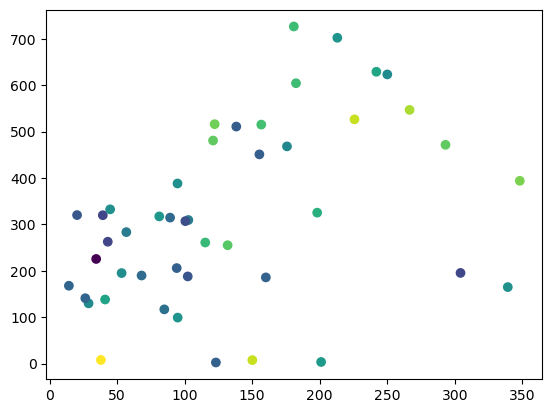

In [7]:
plt.scatter(x=processed.LE_insitu, y=processed.LE, c=processed.ST_C)

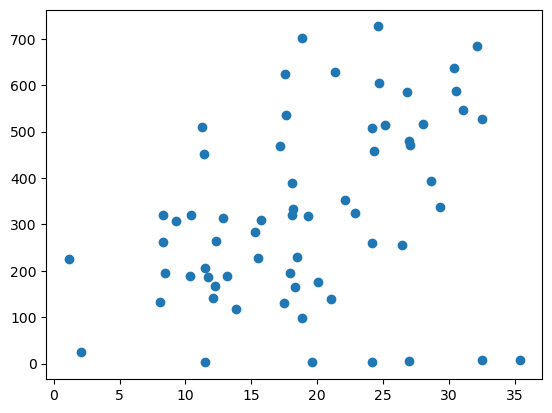

In [8]:
plt.scatter(x=processed.ST_C, y=processed.LE)

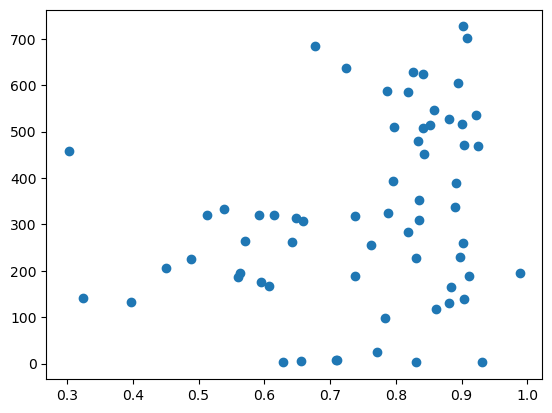

In [9]:
plt.scatter(x=processed.NDVI, y=processed.LE)

In [10]:
input_variable = "LST"
output_variable = "LE"
results = perturbed_run(input_df, input_variable, output_variable, process_verma_STIC_table)
results

[2024-11-19 18:21:14 INFO] variable Ms min: 0.000 mean: 0.417 max: 1.000 nan: 33.82%
[2024-11-19 18:21:14 INFO] running STIC iteration 1 / 30
[2024-11-19 18:21:14 INFO] using variable Priestley-Taylor alpha with mean: 1.747
[2024-11-19 18:21:14 INFO] completed STIC iteration 1 / 30 with max LE change: 254.981 (0.00 seconds)
[2024-11-19 18:21:14 INFO] variable SM_1 min: 0.000 mean: 0.404 max: 1.000 nan: 33.82%
[2024-11-19 18:21:14 INFO] variable G_1 min: 0.409 mean: 25.575 max: 103.700 nan: 52.21%
[2024-11-19 18:21:14 INFO] variable LE_1 min: 2.519 mean: 306.328 max: 682.235 nan: 52.94%
[2024-11-19 18:21:14 INFO] running STIC iteration 2 / 30
[2024-11-19 18:21:14 INFO] using variable Priestley-Taylor alpha with mean: 4.013
[2024-11-19 18:21:14 INFO] completed STIC iteration 2 / 30 with max LE change: 69.165 (0.01 seconds)
[2024-11-19 18:21:14 INFO] variable SM_2 min: 0.000 mean: 0.403 max: 1.000 nan: 33.82%
[2024-11-19 18:21:14 INFO] variable G_2 min: 0.409 mean: 25.575 max: 103.700 nan

/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/initialize_without_solar.py:65: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/closure.py:49: RuntimeWarning: divide by zero encountered in divide
  gS = (-(2 * (phi_Wm2 * alpha * delta_hPa * Ea_hPa * gamma_hPa - phi_Wm2 * alpha * delta_hPa * Es_hPa * gamma_hPa)) / (Cp_Jkg * Estar_hPa ** 2 * gamma_hPa * rho_kgm3 - Cp_Jkg * Es_hPa ** 2 * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * delta_hPa * Es_hPa ** 2 * rho_kgm3 + 2 * Cp_Jkg * delta_hPa * Ea_hPa * Es_hPa * rho_kgm3 - 2 * Cp_Jkg * delta_hPa * Ea_hPa * Estar_hPa * rho_kgm3 + 2 * Cp_Jkg * delta_hPa * Es_hPa * Estar_hPa * rho_kgm3 + 2 * Cp_Jkg * Ea_hPa * Es_hPa * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * Ea_hPa * Estar_hPa * gamma_hPa * rho_kgm3 + Cp_Jkg * SM * Es_hPa ** 2 * gamma_hPa * rho_kgm3 + Cp_Jkg * SM * Estar_hPa ** 2 * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * SM * Es_hPa * Estar_hPa * gamma_hPa *

[2024-11-19 18:21:14 INFO] completed STIC iteration 12 / 30 with max LE change: 4.11 (0.08 seconds)
[2024-11-19 18:21:14 INFO] variable SM_12 min: 0.000 mean: 0.401 max: 1.000 nan: 33.82%
[2024-11-19 18:21:14 INFO] variable G_12 min: 0.409 mean: 25.575 max: 103.700 nan: 52.21%
[2024-11-19 18:21:14 INFO] variable LE_12 min: 2.519 mean: 321.795 max: 726.387 nan: 52.94%
[2024-11-19 18:21:14 INFO] running STIC iteration 13 / 30
[2024-11-19 18:21:14 INFO] using variable Priestley-Taylor alpha with mean: 18.171
[2024-11-19 18:21:14 INFO] completed STIC iteration 13 / 30 with max LE change: 148.934 (0.09 seconds)
[2024-11-19 18:21:14 INFO] variable SM_13 min: 0.000 mean: 0.401 max: 1.000 nan: 33.82%
[2024-11-19 18:21:14 INFO] variable G_13 min: 0.409 mean: 25.575 max: 103.700 nan: 52.21%
[2024-11-19 18:21:14 INFO] variable LE_13 min: 2.519 mean: 320.572 max: 726.387 nan: 52.94%
[2024-11-19 18:21:14 INFO] running STIC iteration 14 / 30
[2024-11-19 18:21:14 INFO] using variable Priestley-Taylor

,input_variable,output_variable,input_unperturbed,input_perturbation,input_perturbation_std,input_perturbed,output_unperturbed,output_perturbation,output_perturbation_std,output_perturbed
0,LST,LE,274.04,14.116572,1.694012,288.156572,NaN,NaN,NaN,NaN
1,LST,LE,274.04,4.706340,0.564768,278.74634,NaN,NaN,NaN,NaN
2,LST,LE,274.04,4.086625,0.490402,278.126625,NaN,NaN,NaN,NaN
3,LST,LE,274.04,-9.227521,-1.107317,264.812479,NaN,NaN,NaN,NaN
4,LST,LE,274.04,-3.704464,-0.444542,270.335536,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13595,LST,LE,279.62,5.270136,0.632425,284.890136,NaN,NaN,NaN,NaN
13596,LST,LE,279.62,-11.905897,-1.428727,267.714103,NaN,NaN,NaN,NaN
13597,LST,LE,279.62,-3.860812,-0.463304,275.759188,NaN,NaN,NaN,NaN
13598,LST,LE,279.62,-3.061918,-0.367435,276.558082,NaN,NaN,NaN,NaN


In [11]:
model_name = "STIC"
forward_process = process_verma_STIC_table   
input_variables = ["LST", "NDVI", "albedo", "Ta_C", "RH", "Rg"]
output_variables = ["LE"]

results = []
correlations = []

for input_variable in input_variables:
    for output_variable in output_variables:
        print(f"input variable: {input_variable}")
        print(f"output variable: {output_variable}")
        
        # run forward process with perturbation
        run_results = perturbed_run(input_df, input_variable, output_variable, forward_process)
        run_results = run_results[run_results[f"{output_variable}_perturbed"] != 0]
        run_results = run_results[run_results[f"{output_variable}_perturbation"] != 0]

        if len(run_results) == 0:
            print(f"no relationship between {input_variable} and {output_variable}")
            continue

        directory = join("analysis_CSVs", model_name)
        makedirs(directory, exist_ok=True)
        filename = join(directory, f"{model_name}_{input_variable}_to_{output_variable}.csv")
        print(filename)
        run_results.to_csv(filename, index=False)

        # input_perturbation = np.array(run_results[f"{input_variable}_perturbation_std"])
        input_perturbation = np.array(run_results[f"{input_variable}_perturbation"])
        # print(len(input_perturbation))
        # output_perturbation = np.array(run_results[f"{output_variable}_perturbation_std"])
        output_perturbation = np.array(run_results[f"{output_variable}_perturbation"])
        # print(len(output_perturbation))
        # perturbation_correlation = np.corrcoef(input_perturbation, output_perturbation)[0,1]
        # correlations.append([input_variable, output_variable, perturation_core])

        # create figure and axis objects
        fig, ax = plt.subplots()

        # create scatter plot
        ax.scatter(input_perturbation, output_perturbation)

        # set title and axis labels
        ax.set_title(f"{model_name} {input_variable} to {output_variable} Sensitivity")
        # ax.set_xlabel(f"{input_variable} Input Perturbation Sigma")
        # ax.set_ylabel(f"{output_variable} Output Perturbation Sigma")
        ax.set_xlabel(f"{input_variable} Input Perturbation")
        ax.set_ylabel(f"{output_variable} Output Perturbation")
        # show plot
        plt.show()

        results.append(run_results)

results = pd.concat(results)
# correlations = pd.DataFrame(correlations, columns=["input_variable", "output_variable", "correlation"]) 
# correlations
results

input variable: LST
output variable: LE
[2024-11-19 18:21:14 INFO] variable Ms min: 0.000 mean: 0.417 max: 1.000 nan: 33.82%
[2024-11-19 18:21:14 INFO] running STIC iteration 1 / 30
[2024-11-19 18:21:14 INFO] using variable Priestley-Taylor alpha with mean: 1.747
[2024-11-19 18:21:14 INFO] completed STIC iteration 1 / 30 with max LE change: 254.981 (0.00 seconds)
[2024-11-19 18:21:14 INFO] variable SM_1 min: 0.000 mean: 0.404 max: 1.000 nan: 33.82%
[2024-11-19 18:21:14 INFO] variable G_1 min: 0.409 mean: 25.575 max: 103.700 nan: 52.21%
[2024-11-19 18:21:14 INFO] variable LE_1 min: 2.519 mean: 306.328 max: 682.235 nan: 52.94%
[2024-11-19 18:21:14 INFO] running STIC iteration 2 / 30
[2024-11-19 18:21:14 INFO] using variable Priestley-Taylor alpha with mean: 4.013
[2024-11-19 18:21:14 INFO] completed STIC iteration 2 / 30 with max LE change: 69.165 (0.00 seconds)
[2024-11-19 18:21:14 INFO] variable SM_2 min: 0.000 mean: 0.403 max: 1.000 nan: 33.82%
[2024-11-19 18:21:14 INFO] variable G_2 

/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/initialize_without_solar.py:65: RuntimeWarning: invalid value encountered in divide
  s44 = (SVP_hPa - Ea_hPa) / (Ta_C - Td_C)
/Users/gregoryhalverson/Projects/ET-Sensitivity/STIC/closure.py:49: RuntimeWarning: divide by zero encountered in divide
  gS = (-(2 * (phi_Wm2 * alpha * delta_hPa * Ea_hPa * gamma_hPa - phi_Wm2 * alpha * delta_hPa * Es_hPa * gamma_hPa)) / (Cp_Jkg * Estar_hPa ** 2 * gamma_hPa * rho_kgm3 - Cp_Jkg * Es_hPa ** 2 * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * delta_hPa * Es_hPa ** 2 * rho_kgm3 + 2 * Cp_Jkg * delta_hPa * Ea_hPa * Es_hPa * rho_kgm3 - 2 * Cp_Jkg * delta_hPa * Ea_hPa * Estar_hPa * rho_kgm3 + 2 * Cp_Jkg * delta_hPa * Es_hPa * Estar_hPa * rho_kgm3 + 2 * Cp_Jkg * Ea_hPa * Es_hPa * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * Ea_hPa * Estar_hPa * gamma_hPa * rho_kgm3 + Cp_Jkg * SM * Es_hPa ** 2 * gamma_hPa * rho_kgm3 + Cp_Jkg * SM * Estar_hPa ** 2 * gamma_hPa * rho_kgm3 - 2 * Cp_Jkg * SM * Es_hPa * Estar_hPa * gamma_hPa *

[2024-11-19 18:21:14 INFO] variable G_16 min: 0.409 mean: 25.575 max: 103.700 nan: 52.21%
[2024-11-19 18:21:14 INFO] variable LE_16 min: 2.519 mean: 320.878 max: 726.387 nan: 52.94%
[2024-11-19 18:21:14 INFO] running STIC iteration 17 / 30
[2024-11-19 18:21:14 INFO] using variable Priestley-Taylor alpha with mean: 18.548
[2024-11-19 18:21:14 INFO] completed STIC iteration 17 / 30 with max LE change: 2.495 (0.10 seconds)
[2024-11-19 18:21:14 INFO] variable SM_17 min: 0.000 mean: 0.401 max: 1.000 nan: 33.82%
[2024-11-19 18:21:14 INFO] variable G_17 min: 0.409 mean: 25.575 max: 103.700 nan: 52.21%
[2024-11-19 18:21:14 INFO] variable LE_17 min: 2.519 mean: 321.139 max: 726.387 nan: 52.94%
[2024-11-19 18:21:14 INFO] running STIC iteration 18 / 30
[2024-11-19 18:21:14 INFO] using variable Priestley-Taylor alpha with mean: 18.557
[2024-11-19 18:21:14 INFO] completed STIC iteration 18 / 30 with max LE change: 2.288 (0.11 seconds)
[2024-11-19 18:21:14 INFO] variable SM_18 min: 0.000 mean: 0.401

KeyError: 'LE_perturbed'

In [ ]:
results_std = results[[column for column in results.columns if column.endswith("std")]]
results_std.columns = [column.replace("_perturbation_std", "") for column in results_std.columns]
results_std_corr = results_std.corr().round(2)[["LE"]]
results_std_corr

In [ ]:
results_std_corr.to_csv('results_std_corr.csv', index=True)